<a href="https://colab.research.google.com/github/YasuharuSuzuki/25_programing2/blob/main/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pandasに関する問題

## 用語の理解を問う問題
- 以下の問題について、正解となる選択肢を出力してください

### 問題10 (3点)
- Pandasの主要なデータ構造で、1次元のラベル付き配列を表すものは何ですか？
    1. DataFrame
    2. Series
    3. Array
    4. List

In [1]:
# 正解を出力してください
print('2') # Seriesは、Pandasの1次元のラベル付き配列を表すデータ構造です。インデックス付きの単一の列のデータを扱うのに適しています。

2


### 問題11 欠損値 (3点)
- DataFrameの欠損値を表すためにPandasが使用する特殊な値は何ですか？
  1. None
  2. NaN
  3. Null
  4. Missing

In [6]:
# 正解を出力してください
print('2')  # NaN（Not a Number）は、Pandasで欠損値を表すために使用される特殊な値です。データ型としてはNumPyのfloat64データ型になります。

2


## プログラムを書く問題
- Titanicのデータセットを使って、データの読み込み、データの確認、データの可視化を行ってください。

### Titanicのデータセット
- タイタニック号の乗船リストから、どのような属性の人が "助かる" かを予測 するデータセットです。
- `data/titanic_train.csv` のデータを読み込んで処理して行きましょう。
- 各列の名称と内容は以下の通りです。

| Variable | Definition | Key |
| --- | --- | --- | 
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex |  |
| age | Age in years |
| sibsp | # of siblings / spouses aboard the Titanic |
| parch | # of parents / children aboard the Titanic |
| ticket | Ticket number | |
| fare | Passenger fare	 | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

### 問題12 Titanicのデータセットを読み込む (6点)

In [34]:
# ライブラリのimport
import pandas as pd # pandasモジュールを読み込む（データ分析ライブラリ）
import matplotlib.pyplot as plt # 可視化ライブラリ
import seaborn as sns # Seabornモジュールを読み込む（可視化ライブラリ。pairplotなど多くのデータ分析情報をplotするのに向いている）

In [ ]:
# drive.mount()を使用してGoogleDriveをMount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# os.chdir()を使用してカレントディレクトリを変更。作成したショーットカット名を使ってパスを指定します。
import os
os.chdir('/content/drive/MyDrive/＜作成したショートカット名＞')

In [8]:
# データファイルパス定義
TITANIC_TRAIN_CSV = "./data/titanic_train.csv"

In [11]:
# read_csvを使ってcsvを読み込みます
df_titanic = pd.read_csv(TITANIC_TRAIN_CSV, index_col='PassengerId') # PassengerIdがindexに使用できるため、index_col='PassengerId'を指定します

### 問題13 読み込んだDataFrameを確認(12点)
- 以下のいずれかの確認作業を少なくとも３つ行って、それぞれに最低１つの簡単な考察をつけてみましょう
  - ざっと眺める
  - カテゴリカル変数の確認
  - 行数、列数、データ型、欠損値の確認
  - 基本統計量の確認

In [12]:
# 先頭５行のデータをざっと眺める
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- カテゴリカル変数が含まれていますね。sex, embarked, Ticket, Cabin, Embarked
- Nameはうまく使えば特徴量になりそうですが、初期の分析では省いても良さそうです
- Cabinは欠損値多そうですね
- 目的変数はSurvivedですね

In [14]:
# 行数、列数、データ型、欠損値の確認
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


- ageも結構欠損値ありますね
- Cabinは列ごと削除しても良さそうです

In [25]:
# 基本統計量の確認
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Survivedの平均値が0.38とのことで、約38％の方が生き残ったことがわかります

In [19]:
# カテゴリカル変数を確認していく
df_titanic['Name'].value_counts()

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

- 完全にユニークですね
- Mr. Mrs. Miss. が入っているので独身か否かが判断できそうです
- 家族と一緒に乗っているケースとかも生存率に影響しそうですね
- 初期はモデル開発に使わなくて良さそうです

In [21]:
df_titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

- 男性と女性の2種類だけです

In [23]:
df_titanic['Ticket'].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

- 同じTicketの人が居ますね。同室の可能性ありそうです

In [24]:
df_titanic['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

- 先頭に英文字＋数字で構成されており、客室のグレードになっている可能性はあるかもしれません
- 生存率に関わってきそうなら適切に処理して上げた方が良さそうですね

### 問題14 欠損値の対策(6点)
- Age は平均値を求めてfillnaで埋めてみましょう。
- Cabin はfillna('Unknown')を使用して埋めてみましょう。

In [55]:
# ageを埋める
age_mean = df_titanic['Age'].mean()
df_titanic['Age'] = df_titanic['Age'].fillna(age_mean)

In [29]:
# Cabinを埋める
df_titanic['Cabin'] = df_titanic['Cabin'].fillna('Unknown')

In [30]:
# 欠損値が無くなったことを確認しましょう
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### 問題15 読み込んだDataFrameの可視化(12点)
- 以下のいずれかの可視化を少なくとも２つ行って、それぞれに最低１つの簡単な考察をつけてみましょう
  - 棒グラフの表示
  - 散布図の表示
  - 箱ひげ図の表示
  - ヒストグラムの表示
  - 相関係数の表示
  - 多変量連関図の表示

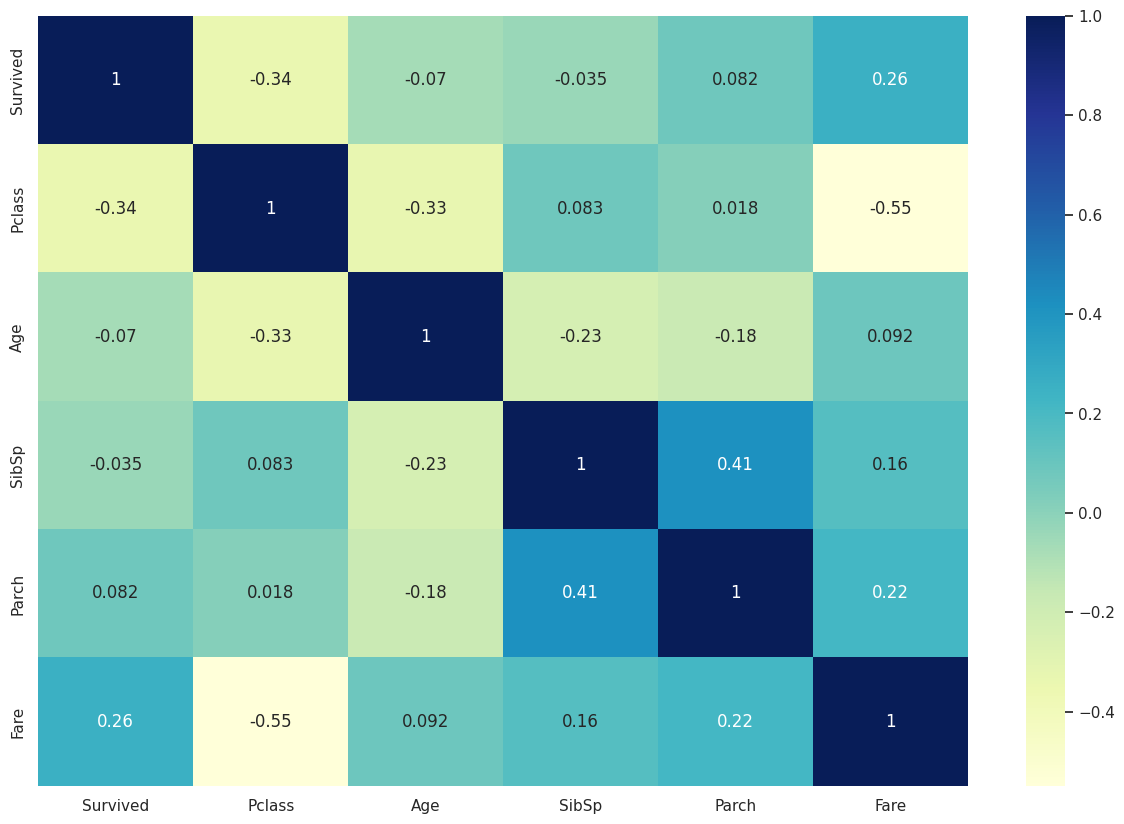

In [35]:
# 相関係数を表示
corr_columns = ['Survived','Pclass','Age','SibSp','Parch','Fare']
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df_titanic[corr_columns].corr(), annot=True, cmap="YlGnBu")
plt.show()

- PclassとSurvivedが若干相関ありますね
- FareとPclassは結構相関ありますが、Pclassごとに乗船料がある程度決まっているのでしょう
- FareとSibSp(一緒に乗船した兄弟、配偶者の数)、Parch（一緒に乗船した親子の数）も少し相関があります

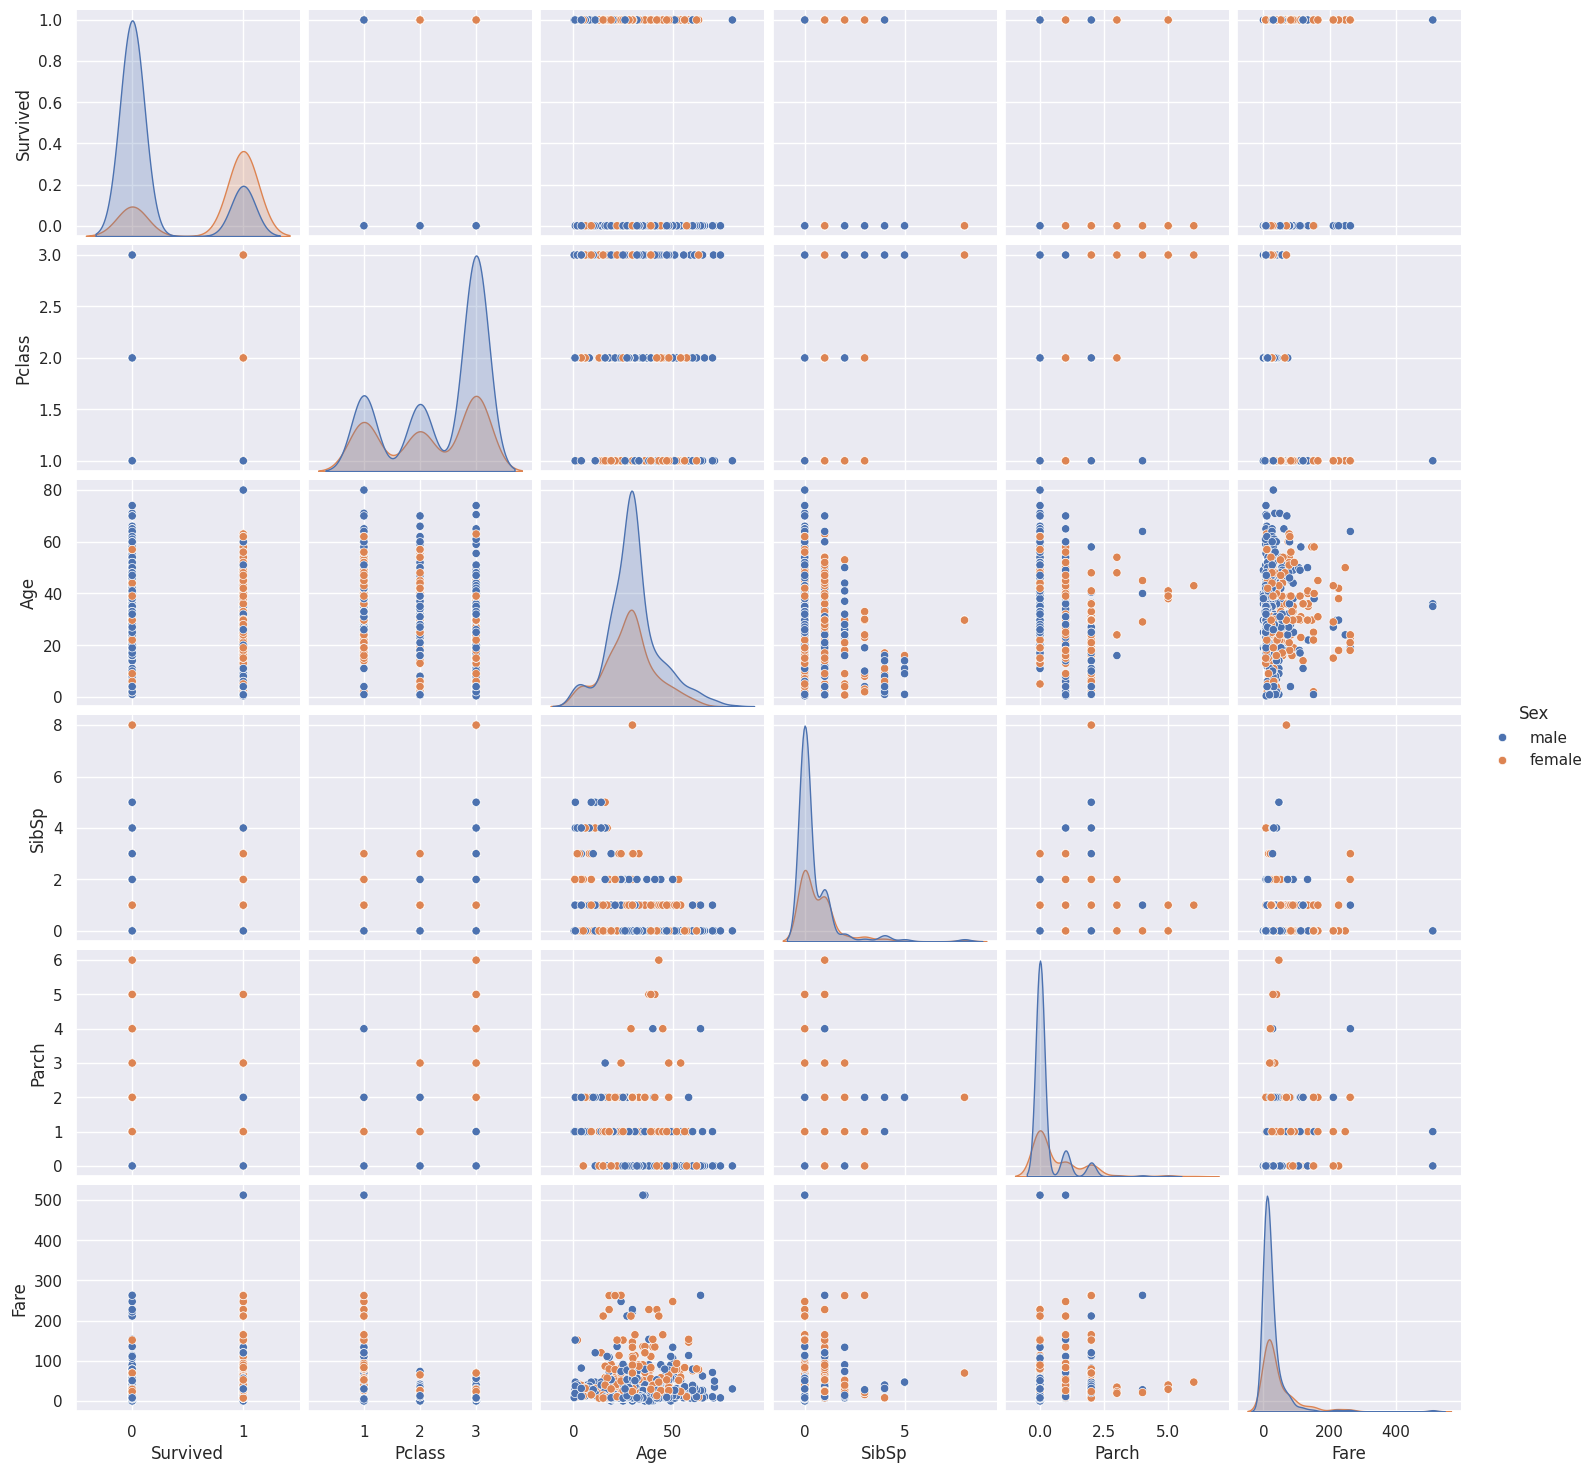

In [36]:
# 性別で層別してplot
pairplot_columns1 = corr_columns + ['Sex']
sns.pairplot(df_titanic[pairplot_columns1], hue='Sex')

- 男性と女性とで生存率に大きな差があります

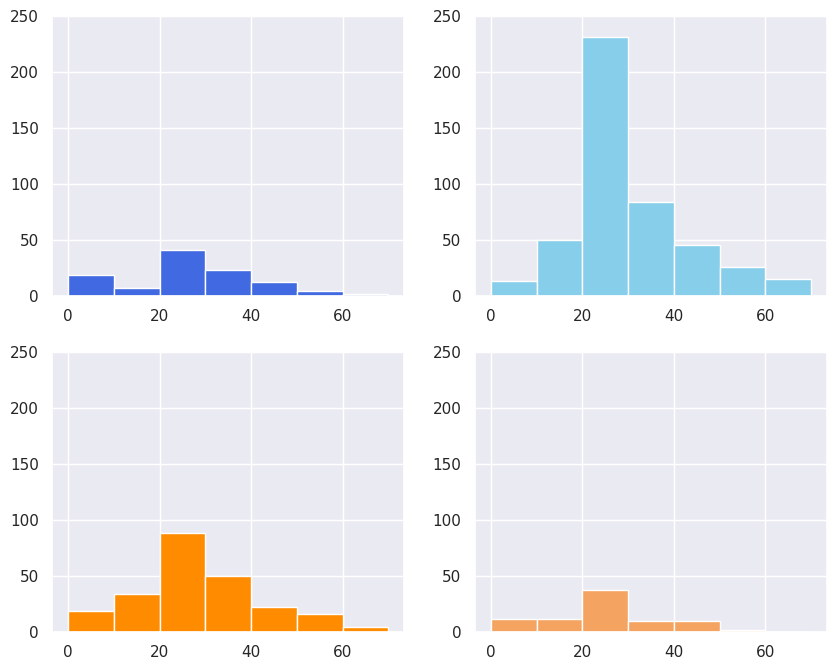

In [47]:
# ヒストグラムの表示
bins_range = range(0,80,10)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
df_titanic[(df_titanic['Sex'] == 'male') & (df_titanic['Survived'] == 1)]['Age'].hist(color='royalblue', bins=bins_range, ax=axes[0][0])
df_titanic[(df_titanic['Sex'] == 'male') & (df_titanic['Survived'] == 0)]['Age'].hist(color='skyblue', bins=bins_range, ax=axes[0][1])
df_titanic[(df_titanic['Sex'] == 'female') & (df_titanic['Survived'] == 1)]['Age'].hist(color='darkorange', bins=bins_range, ax=axes[1][0])
df_titanic[(df_titanic['Sex'] == 'female') & (df_titanic['Survived'] == 0)]['Age'].hist(color='sandybrown', bins=bins_range, ax=axes[1][1])

# 上限を250に制限する
for ax1 in axes:
    for ax2 in ax1:
        ax2.set_ylim(0,250)

- 平均値で埋めたことを考慮しても、男性は死亡率が高い。特に20代の男性で死亡している件数が非常に多い
- 一方で女性の生存率は高い。男性との比較でも高い。20代での生存件数も多い（母数が多いというのもあると思うが）

(0.0, 100.0)

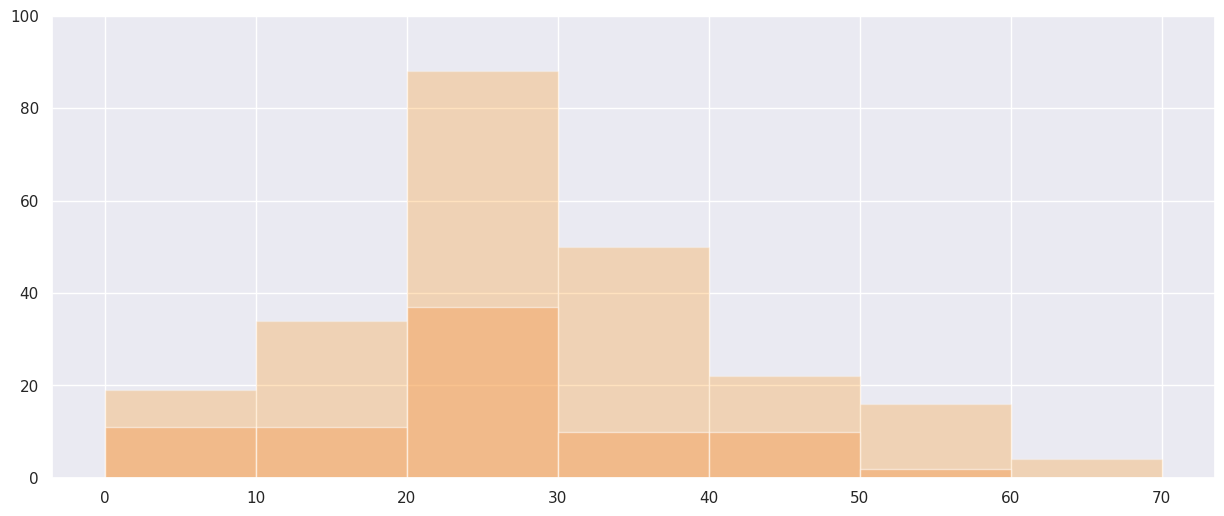

In [53]:
# 女性だけでヒストグラムの表示
bins_range = range(0,80,10)
fig, axes = plt.subplots(1, 1, figsize=(15, 6))
df_titanic[(df_titanic['Sex'] == 'female') & (df_titanic['Survived'] == 1)]['Age'].hist(color='darkorange', bins=bins_range, alpha=0.25, ax=axes)
df_titanic[(df_titanic['Sex'] == 'female') & (df_titanic['Survived'] == 0)]['Age'].hist(color='sandybrown', bins=bins_range, alpha=0.50, ax=axes)

# 上限を100に制限する
axes.set_ylim(0,100)

- 全体的に生存率が高い

---
---
---
---
---